In [1]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#for showing graphs/plots in notebook
%matplotlib inline

In [2]:
#load the dataset and display
insurance_df=pd.read_csv("med insurance dataset.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#check number of rows and columns in dataset
insurance_df.shape

(1338, 7)

In [4]:
#checking number of null values in each column
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#getting statistical data fro the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


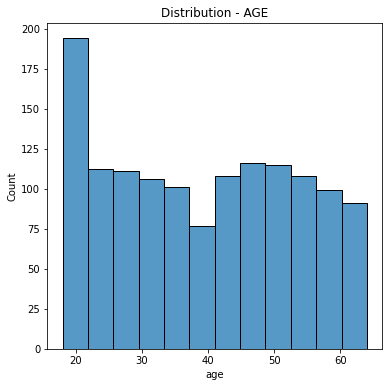

In [7]:
# graphical interpretation - AGE
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['age'])
plt.title("Distribution - AGE")
plt.show()

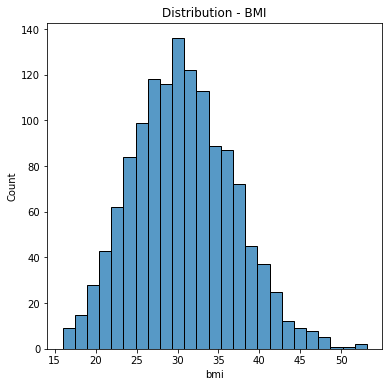

In [8]:
# graphical interpretation - BMI
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['bmi'])
plt.title("Distribution - BMI")
plt.show()

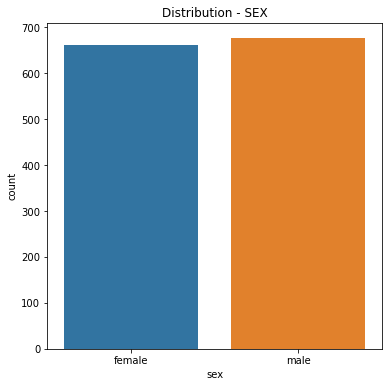

In [9]:
# graphical interpretation - SEX
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_df['sex'])
plt.title("Distribution - SEX")
plt.show()

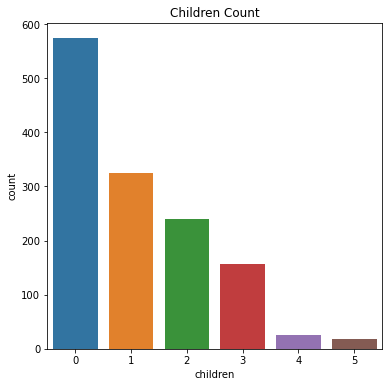

In [10]:
# graphical interpretation - Children
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_df['children'])
plt.title("Children Count")
plt.show()

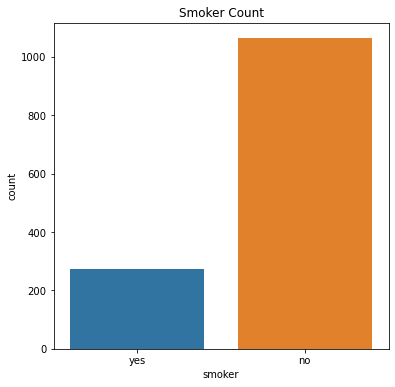

In [11]:
# graphical interpretation - Smoker
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_df['smoker'])
plt.title("Smoker Count")
plt.show()

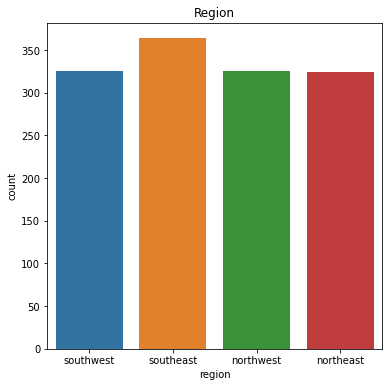

In [12]:
# graphical interpretation - Region
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_df['region'])
plt.title("Region")
plt.show()

In [13]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

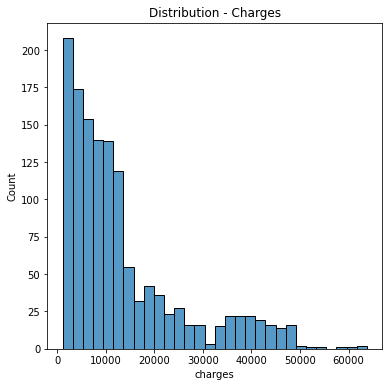

In [14]:
# graphical interpretation - Charges 
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['charges'])
plt.title("Distribution - Charges")
plt.show()

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
#replacing Sex column values -> male to 0 and female to 1
insurance_df.replace({'sex':{'male': 0, 'female': 1}},inplace=True)

#replacing Smoker column values-> yes - 0 and no - 1
insurance_df.replace({'smoker':{'yes' : 0 , 'no' : 1}},inplace= True)

#replacing Region column values -> NE - 0 , NW - 1 , SE - 2 , SW -3
insurance_df.replace({'region':{'northeast' : 0 , 'northwest' : 1, 'southeast' : 2, 'southwest' : 3}},inplace=True)

In [17]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [18]:
#splitting dataset into X (dependent features) and Y target feature
X = insurance_df.drop(columns='charges',axis=1)
Y = insurance_df['charges']

In [19]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,3
1,18,0,33.770,1,1,2
2,28,0,33.000,3,1,2
3,33,0,22.705,0,1,1
4,32,0,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1
1334,18,1,31.920,0,1,0
1335,18,1,36.850,0,1,2
1336,21,1,25.800,0,1,3


In [20]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [55]:
#splitting X and Y for train test 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
#linear model loading
reg=RandomForestRegressor(n_estimators=40)

In [57]:
#fitting data into model
reg.fit(x_train,y_train)
#predicting train data values
train_predict=reg.predict(x_train)

In [58]:
r2_train=metrics.r2_score(y_train,train_predict)
r2_train

0.9732407759340519

In [59]:
test_predict=reg.predict(x_test)
r2_test=metrics.r2_score(y_test,test_predict)
r2_test

0.8735088020578183

In [60]:
import numpy as np
dt = np.asarray((31,1,25.74,0,1,2))
dt=dt.reshape(1,-1)
reg.predict(dt)

c:\Users\Aditya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3731.3782525])